# Root-Finding Methods

## Previous definitions

### Intermediate Value Theorem (IVT)

Consider an interval $I = [a, b] \in R$ and a continuous function $f : I → R$. Let $M$ be any number between $f(a)$ and $f(b)$, then there exists a number $c$ such that:
* $a < c < b$
* $f(c) = M$

This theorem is also known as **Bolzano’s Theorem**.


All the Intermediate Value Theorem is really saying is that a
continuous function will take on all values between $f(a)$ and $f(b)$.


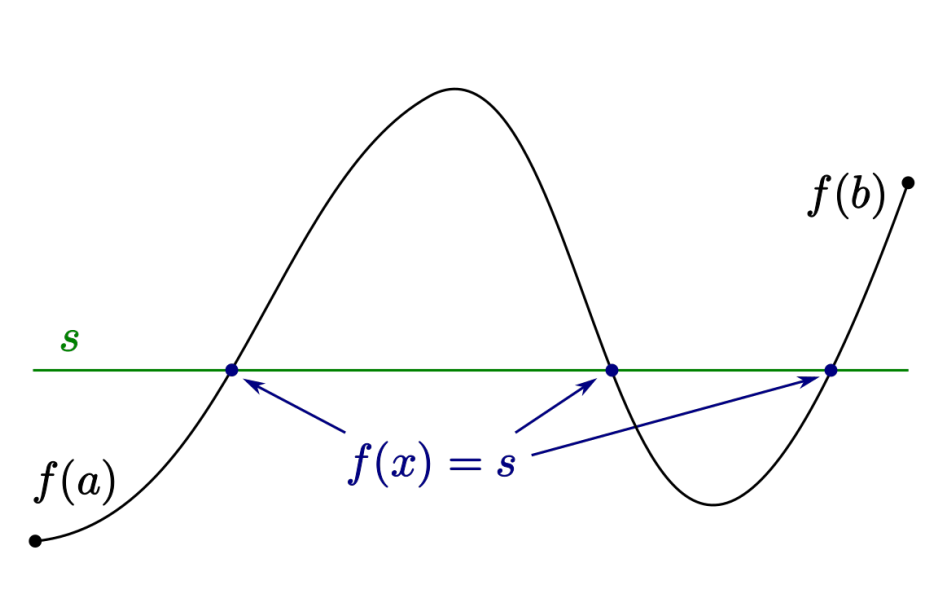

### Bolzano’s Theorem

Consider an interval $I = [a, b] \in R$ and a continuous function $f : I → R$, where $f(a)$ and $f(b)$ are of opposite signs. Then there exists a number $x_0 \in I$ with $f(x_0) = 0$.

This is an special case of the IVT and Rolle’s Theorem.

## Problem Statement

### Root of a function

Given a function $f(x)$. Find a number $x = r$ such that $f(r) = 0$

Such number r is called a root of the equation $f(x) = 0$ or a zero of the function $f(x)$. There are as many (real) roots as places where the function crosses the x-axis.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import math

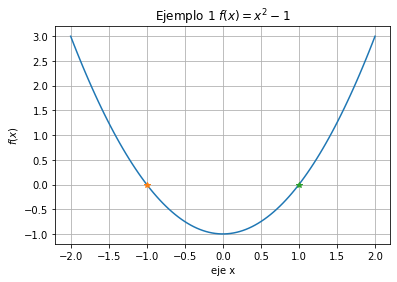

In [ ]:
x = np.linspace(-2,2,100)
f = x**2 - 1
plt.plot(x,f)
plt.plot(-1,0, '*')
plt.plot(1,0, '*')

plt.title("Ejemplo 1 $f(x) = x^2 - 1$")
plt.xlabel("eje x")
plt.ylabel("$f(x)$")
plt.grid(True)

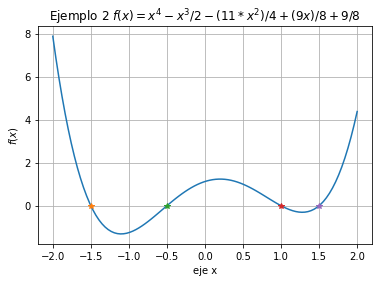

In [ ]:
x = np.linspace(-2,2,100)
f = x**4 - x**3/2 - (11*x**2)/4 + (9*x)/8 + 9/8
plt.plot(x,f)
plt.plot(-1.5,0, '*')
plt.plot(-0.5,0, '*')
plt.plot(1,0, '*')
plt.plot(1.5,0, '*')

plt.title("Ejemplo 2 $f(x) = x^4 - x^3/2 - (11*x^2)/4 + (9x)/8 + 9/8$")
plt.xlabel("eje x")
plt.ylabel("$f(x)$")
plt.grid(True)

In [ ]:
x = np.linspace(-2,2,100)


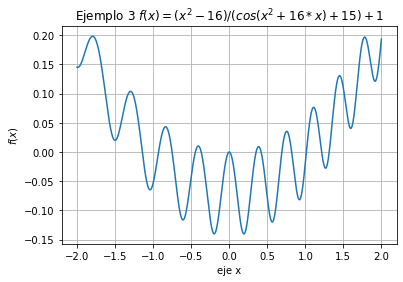

In [ ]:
x = np.linspace(-2,2,1000)
f = (x**2 - 16)/((np.cos(x**2 + 16*x)) + 15) + 1
plt.plot(x,f)


plt.title("Ejemplo 3 $f(x) = (x^2 - 16)/(cos(x^2 + 16*x) + 15) + 1$")
plt.xlabel("eje x")
plt.ylabel("$f(x)$")
plt.grid(True)

Methods

* Bracketing methods or Closed Methods
 * Bisection Method
 * Regula Falsi Method
* Iterative methods or Open Methods
 * Newton’s Method
 * Secant Method
 * Fixed Point Method (yours)

#### Bracketing methods or Closed Methods

##### Bisection

The bisection method is the simplest and 'most robust' algorithm for finding the root of a one-dimensional continuous function on a closed interval.

Suppose $f(x)$ is continuous on an interval $[a, b]$ and
$f(a) ⋅ f(b) < 0$ (they have different sign). By Bolzano’s Theorem, there is a root $r$ in the interval $[a, b]$


The main idea of the method is:
1. Set a value for a and b.
2. Compute $c = \frac{a+b}{2}$
3. If $f(a) \cdot f(c) < 0 \text{ then } b = c$ or if $f(a) \cdot f(c) > 0 \text{ then } a = c$
4. Compute stopping Criteria, if achieved, return c, if not, return to step 2.


In other words, the simplest numerical procedure for finding a root is to repeatedly halve the interval $[a, b]$, keeping the half for which $f(x)$ changes sign.

Mathematically, if all conditions are given, the method is guarantee to converge, but it might take too long. So we must set a **threshold** for which the answer is correct enough. Such threshold is known as **tolerance**.

The most common stopping criteria are:
* $f(c) = 0$ (would be nice if this happens)
* $|f(c)| < \text{tolerance}$
* $|c_i − c_{i+1}| < \text{tolerance}$ or ($ \left| \frac{c_i − c_{i+1}}{c_i} \right| < \text{tolerance}$)

* $ \left| \frac{a−b}{2} \right| < \text{tolerance (Might be risky)}$

In [ ]:
x = sym.Symbol('x')
f = input('digite funcion en terminos de x \n')
f = sym.sympify(f) 
a = float(input('Digita el valor inicial del intervalo para evaluacion a: \n '))
b = float(input('Digita el valor final del intervalo para evaluacion b: \n '))
tol = tol = 5*10**(-5);

while(a>=b):
  a = float(input('Digita el valor del intervalo para evaluacion a: \n '))
  b = float(input('Digita el valor del intervalo para evaluacion b: \n '))

sw = True
i = 0
c_anterior = 0
Error_list = []
c_values = []
f_c_values = []
while sw == True: # can be onle while sw:
  c_actual = (a+b)/2
  print('Iteration-%d, a = %0.6f, b = %0.6f,  c = %0.6f' % (i,a, b, c_actual))
  print('f(a) = %0.6f, f(b) = %0.6f,  f(c) = %0.6f' % (f.subs(x,a).evalf(),
                                                       f.subs(x,b).evalf(),
                                                       f.subs(x,c_actual).evalf()))
  c_values.append(c_actual)
  f_c_values.append(f.subs(x,c_actual).evalf())
  if (f.subs(x,c_actual).evalf() == 0.0):
    break
  elif (f.subs(x,c_actual).evalf() * f.subs(x,a).evalf() < 0):
    b = c_actual
  else:
    a = c_actual
  i = i + 1
  Error = np.abs((c_actual-c_anterior)/c_actual)
  c_anterior = c_actual
  print('Error = %0.6f' % (Error))
  print('-----------------------------------')
  Error_list.append(Error)
  
  sw = Error > tol
# x** 4 - 3*x**3 + 2*x - 7 a = 3, b = 4
# x**3-5*x-9 a= 2, b = 3

digite funcion en terminos de x 
x**3-5*x-9
Digita el valor inicial del intervalo para evaluacion a: 
 2
Digita el valor final del intervalo para evaluacion b: 
 3
Iteration-0, a = 2.000000, b = 3.000000,  c = 2.500000
f(a) = -11.000000, f(b) = 3.000000,  f(c) = -5.875000
Error = 1.000000
-----------------------------------
Iteration-1, a = 2.500000, b = 3.000000,  c = 2.750000
f(a) = -5.875000, f(b) = 3.000000,  f(c) = -1.953125
Error = 0.090909
-----------------------------------
Iteration-2, a = 2.750000, b = 3.000000,  c = 2.875000
f(a) = -1.953125, f(b) = 3.000000,  f(c) = 0.388672
Error = 0.043478
-----------------------------------
Iteration-3, a = 2.750000, b = 2.875000,  c = 2.812500
f(a) = -1.953125, f(b) = 0.388672,  f(c) = -0.815186
Error = 0.022222
-----------------------------------
Iteration-4, a = 2.812500, b = 2.875000,  c = 2.843750
f(a) = -0.815186, f(b) = 0.388672,  f(c) = -0.221588
Error = 0.010989
-----------------------------------
Iteration-5, a = 2.843750, b = 

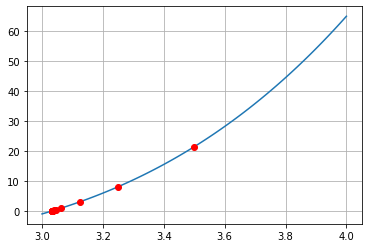

In [ ]:
x_range = np.linspace(3,4,100)
plot_f = x_range** 4 - 3*x_range**3 + 2*x_range - 7
plt.grid(True)
plt.plot(x_range, plot_f)
plt.plot(c_values, f_c_values, 'or')

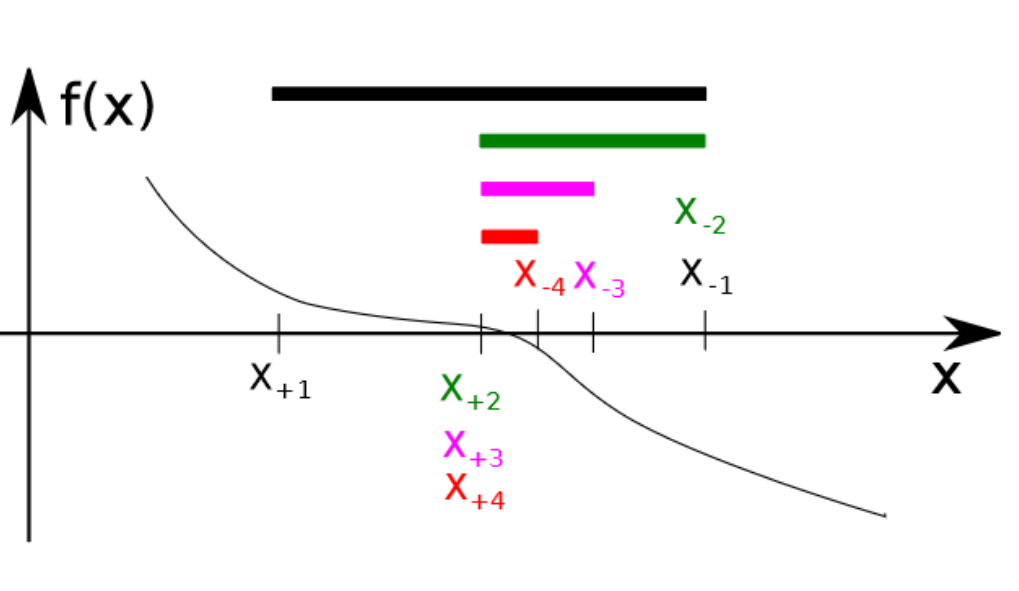

Benefits vs Disadvantages:

* Benefits
 * It is guaranteed to find an approximation to the root within a given degree of accuracy in a known number of iterations.
  * The method does not rely on the derivatives of the function.

* Disadvantages
  * Slow Rate of Convergence
  * Does not take into consideration information about the
function. (e.g. Physical quantity)


##### False Position

Suppose now, instead of choosing the midpoint for $[a, b]$, we are going to draw a line which joins the points $(a, f(a))$ and $(b, f(b))$ and their intersection with the x-axis. Using this, we will compute the slope of such lines.


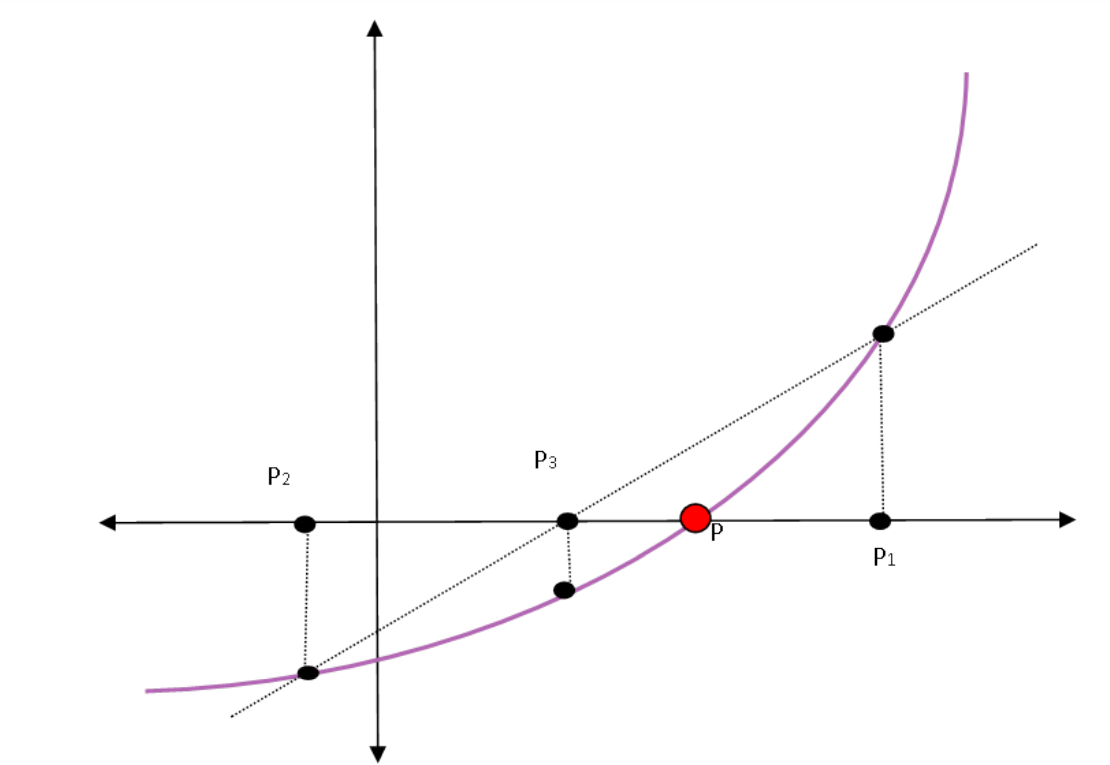

$$ tan(a) = tan(b) $$

$$ \frac{f(a)}{r- a} = \frac{f(b)}{r- b} $$

$$ f(a)\cdot(r-b) = f(b)\cdot(r-a) $$

$$ f(a)\cdot r- f(a)\cdot b = f(b) \cdot r- f(b) \cdot a $$

$$ f(a) \cdot r - f(b) \cdot r = f(a) \cdot b - f(b) \cdot a $$

$$ r = \frac{f(a) \cdot b - f(b) \cdot a}{f(a) - f(b)} $$

which is equivalent to

$$ r = \frac{a \cdot f(b) − b \cdot f(a)}{f(b) − f(a)} $$

In [ ]:
x = sym.Symbol('x')
f = input('digite funcion en terminos de x \n')
f = sym.sympify(f) 
a = float(input('Digita el valor inicial del intervalo para evaluacion a: \n '))
b = float(input('Digita el valor final del intervalo para evaluacion b: \n '))
tol = tol = 5*10**(-5);

while(a>=b):
  a = float(input('Digita el valor del intervalo para evaluacion a: \n '))
  b = float(input('Digita el valor del intervalo para evaluacion b: \n '))

sw = True
i = 0
c_anterior = 0
Error_list = []
c_values = []
f_c_values = []
while sw == True: # can be onle while sw:
  c_actual = (f.subs(x,a).evalf() * b - f.subs(x,b).evalf() * a)/\
  (f.subs(x,a).evalf() - f.subs(x,b).evalf())

  print('Iteration-%d, a = %0.6f, b = %0.6f,  c = %0.6f' % (i,a, b, c_actual))
  print('f(a) = %0.6f, f(b) = %0.6f,  f(c) = %0.6f' % (f.subs(x,a).evalf(),
                                                       f.subs(x,b).evalf(),
                                                       f.subs(x,c_actual).evalf()))
  c_values.append(c_actual)
  f_c_values.append(f.subs(x,c_actual).evalf())
  if (f.subs(x,c_actual).evalf() == 0.0):
    break
  elif (f.subs(x,c_actual).evalf() * f.subs(x,a).evalf() < 0):
    b = c_actual
  else:
    a = c_actual
  i = i + 1
  Error = np.abs((c_actual-c_anterior)/c_actual)
  c_anterior = c_actual
  print('Error = %0.6f' % (Error))
  print('-----------------------------------')
  Error_list.append(Error)
  
  sw = Error > tol
# x** 4 - 3*x**3 + 2*x - 7 a = 3, b = 4
# x**3-5*x-9 a= 2, b = 3

digite funcion en terminos de x 
x** 4 - 3*x**3 + 2*x - 7
Digita el valor inicial del intervalo para evaluacion a: 
 3
Digita el valor final del intervalo para evaluacion b: 
 4
Iteration-0, a = 3.000000, b = 4.000000,  c = 3.015152
f(a) = -1.000000, f(b) = 65.000000,  f(c) = -0.554376
Error = 1.000000
-----------------------------------
Iteration-1, a = 3.015152, b = 4.000000,  c = 3.023480
f(a) = -0.554376, f(b) = 65.000000,  f(c) = -0.304074
Error = 0.002755
-----------------------------------
Iteration-2, a = 3.023480, b = 4.000000,  c = 3.028027
f(a) = -0.304074, f(b) = 65.000000,  f(c) = -0.165807
Error = 0.001502
-----------------------------------
Iteration-3, a = 3.028027, b = 4.000000,  c = 3.030500
f(a) = -0.165807, f(b) = 65.000000,  f(c) = -0.090122
Error = 0.000816
-----------------------------------
Iteration-4, a = 3.030500, b = 4.000000,  c = 3.031842
f(a) = -0.090122, f(b) = 65.000000,  f(c) = -0.048899
Error = 0.000443
-----------------------------------
Iteration-5,

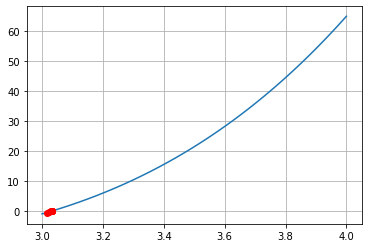

In [ ]:
x_range = np.linspace(3,4,100)
plot_f = x_range** 4 - 3*x_range**3 + 2*x_range - 7
plt.grid(True)
plt.plot(x_range, plot_f)
plt.plot(c_values, f_c_values, 'or')

#### Iterative methods or Open Methods

##### Newton's method

Let’s visit an old friend ... or enemy. Let’s suppose a polynomial using the first two terms of the Taylor series:

$$f(x) \approx f(x_0) + f'(x_0)(x − x_0) $$

if we set $f(x) = 0$

$$0 = f(x_0) + f'(x_0)(x − x_0) $$

$$-f(x_0) =  + f'(x_0)(x − x_0) $$

$$ \frac{-f(x_0)}{f'(x_0)} = (x − x_0) $$

$$ \frac{-f(x_0)}{f'(x_0)} + x_0= x $$

$$ x =  x_0 - \frac{f(x_0)}{f'(x_0)} $$

The above result is know as Newton's method


Assume that $f''(x)$ exists and is continuous on $[a, b]$ and $r$ is a simple root of $f(x)$, that is, $f(r) = 0$ and $f'(r) \neq 0$, then, $x_{i+1}$ is an approximation to r obtained by:

$$ x_{i+1} = x_{i} - \frac{f(x_i)}{f'(x_i)}$$


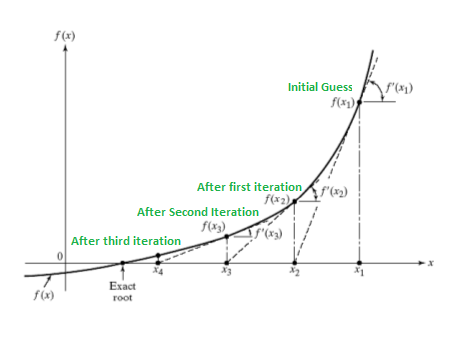

Image taken from [link](https://www.geeksforgeeks.org/program-for-newton-raphson-method/)

Benefits:

* Only requires one estimate (initial point)
* If converges, does it faster than closed methods
* Can diverge is estimation is too far from the root or if an inflection point is near the root.
* includes a new stopping criteria: the number of iterations.



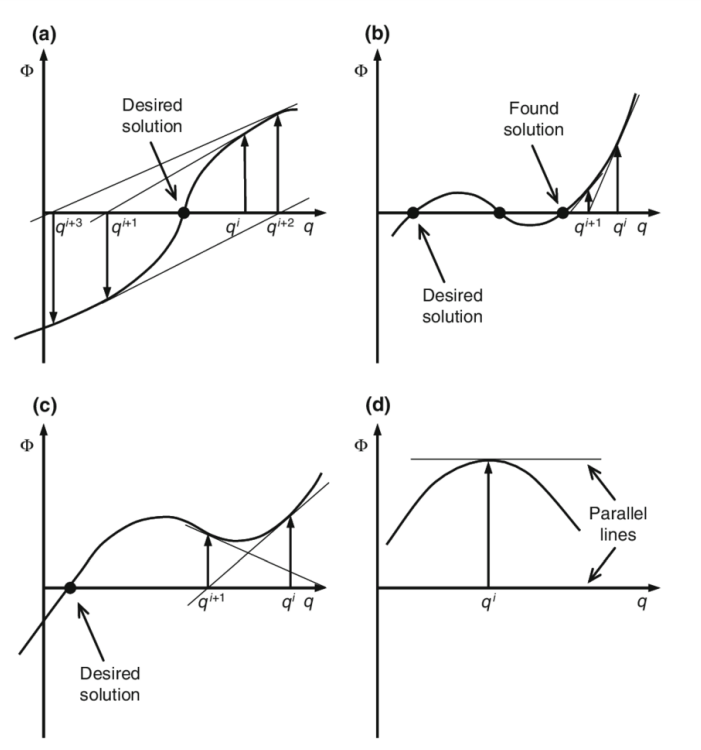

In [ ]:
x = sym.Symbol('x')
f = input('digite funcion en terminos de x \n')
f = sym.sympify(f) 
x_0 = float(input('Digita el valor inicial del intervalo para evaluacion x0: \n '))
itera = int(input('Digita el num max de iteraciones: \n '))

tol = tol = 5*10**(-5);

sw = True
i = 0
Error_list = []
xr_list = []
f_xr_list = []
derivada = sym.diff(f, x, 1)

while sw == True and i < itera: # can be onle while sw:
  x_r = x_0 - f.subs(x,x_0).evalf()/derivada.subs(x,x_0).evalf() 
  xr_list.append(x_r)
  f_xr_list.append(f.subs(x,x_r).evalf())
  print('Iteration-%d, x_0 = %0.6f, x_r = %0.6f' % (i,x_0, x_r))
  print('f(x_0) = %0.6f, f(x_r) = %0.6f' % (f.subs(x,x_0).evalf(),
                                                       f.subs(x,x_r).evalf()))
  Error = np.abs((x_r-x_0)/x_r)
  x_0 = x_r
  i = i + 1
  print('Error = %0.6f' % (Error))
  print('-----------------------------------')
  Error_list.append(Error)
  
  sw = Error > tol
# x**3 + 2*x**2 + 2*x - 1 x0 = 1
# x**3 - 5*x - 9 x0 = 2
# 3*cos(x) - exp(x) x0 = 0.5

digite funcion en terminos de x 
3*cos(x) - exp(x)
Digita el valor inicial del intervalo para evaluacion x0: 
 0.5
Digita el num max de iteraciones: 
 10
Iteration-0, x_0 = 0.500000, x_r = 0.818765
f(x_0) = 0.984026, f(x_r) = -0.218326
Error = 0.389324
-----------------------------------
Iteration-1, x_0 = 0.818765, x_r = 0.769798
f(x_0) = -0.218326, f(x_r) = -0.005174
Error = 0.063611
-----------------------------------
Iteration-2, x_0 = 0.769798, x_r = 0.768579
f(x_0) = -0.005174, f(x_r) = -0.000003
Error = 0.001585
-----------------------------------
Iteration-3, x_0 = 0.768579, x_r = 0.768579
f(x_0) = -0.000003, f(x_r) = -0.000000
Error = 0.000001
-----------------------------------


Disadvantage (big one):

* A major disadvantage of the Newton Method is the requirement of finding the value of the derivative of $f(x)$ at each approximation.

##### Secant method

A way to handle the above disadvantage is to approximate the derivative. Knowing $f(x_k)$ and $f(x_{k−1})$, we can approximate $f'(x_k)$.

by using the finite-difference approximation

$$ f'(x_i) ≈ \frac{f(x_i) - f(x_{i-1})}{x_i - x_{i-1}}$$

$$ x_{i+1} = x_{i} - \frac{f(x_i)}{f'(x_i)}$$

$$ x_{i+1} = x_{i} - f(x_i)\frac{x_i - x_{i-1}}{f(x_i) - f(x_{i-1}}$$

$$ f(x_{i+1}) = \frac{x_i \cdot f(x_{i-1}) - x_{i-1} \cdot f(x_{i})}{f(x_{i-1}) - f(x_{i})}$$

which is equivalent to

$$ f(x_{i+1}) = \frac{x_{i-1} \cdot f(x_{i}) - x_i \cdot f(x_{i-1})}{f(x_{i}) - f(x_{i-1})}$$



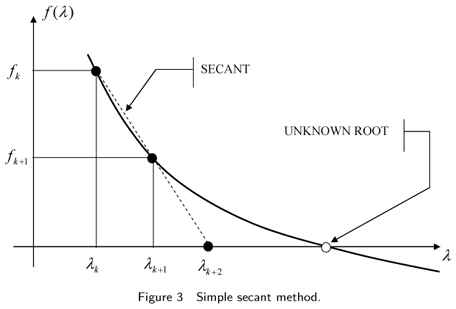

image taken from [link](https://www.scielo.br/j/lajss/a/RPCQCGhtW7pQ9VB7nHG3S7g/?lang=en)

$f(x) = x^3 - 5x^2 + 4x + 1$

$x = g(x_{x-1})$ 

$0 = x^3 - 5x^2 + 4x + 1$

$-4x = x^3 - 5x^2 + 1$

$x = \dfrac{x^3 - 5x^2 + 1}{-4}$


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from sympy import parse_expr

In [54]:
#@title punto fijo 

g = parse_expr("(x ** 3 - 5 * x ** 2 + 1) / -4")

error = 1 
error_r = 1

errores = []

tolerancia = 0.001
iteraciones_maximas = 1000

punto_anterior = 2

iteraciones = 1 

while iteraciones < iteraciones_maximas:

  punto_siguiente = g.subs(x, punto_anterior).evalf()

  error_actual = np.abs(punto_anterior - punto_siguiente)

  errores.append(error_actual)

  if error_actual < tolerancia:

    print(f"La raíz apróximada es {punto_siguiente} encontrada en la iteración {iteraciones}")
    break
  
  punto_anterior = punto_siguiente
  iteraciones = iteraciones + 1

else:

  print(f"Se alcanzó el límite de iteraciones, la aproximación encontrada fue: {punto_siguiente}")

Se alcanzó el límite de iteraciones, la aproximación encontrada fue: 3.79374020702163


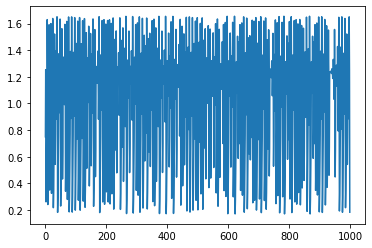

In [59]:
plt.plot(errores)

In [60]:
errores

[0.750000000000000,
 1.25390625000000,
 0.261745467782021,
 0.411461150720230,
 0.753071628620676,
 0.973355750221529,
 1.62944675739283,
 1.25275589400403,
 0.241659139582227,
 0.382415923701879,
 0.697886009043627,
 0.924994366039114,
 1.59065219227477,
 1.25837972526602,
 0.350316047045536,
 0.534106630427877,
 0.984436822821598,
 1.13493225198603,
 1.59947518627823,
 1.25723146456354,
 0.325634982647908,
 0.500832448376062,
 0.922177633685941,
 1.09795706701758,
 1.63793263710827,
 1.25132867926230,
 0.217872226851503,
 0.347445114256065,
 0.631503931258070,
 0.861796134854483,
 1.52115924588698,
 1.26468300481507,
 0.543044126579850,
 0.769087479004581,
 1.39175215934578,
 1.26302870591374,
 0.884638129939155,
 1.07335864951700,
 1.65044049032790,
 1.24909741110733,
 0.182825958893574,
 0.294805194582599,
 0.531995299029418,
 0.756830519181699,
 1.37279918697529,
 1.26127655541412,
 0.931715002891613,
 1.10392983238862,
 1.63346424281986,
 1.25208895584844,
 0.230397183406959,
 0.